In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('netflix_titles.csv', encoding='iso-8859-1') 

Quais colunas estão presentes no Dataset?

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Quantos filmes estão disponíveis na Netflix?

In [4]:
# Filtrar por 'Filmes' e contar
num_filmes = df[df['type'] == 'Movie'].shape[0]
print(f"Há {num_filmes} filmes disponíveis na Netflix.")


Há 6131 filmes disponíveis na Netflix.


Quais os 5 Diretores com mais Filmes e Séries na plataforma?

In [5]:
# Contar a quantidade de filmes/séries por diretor
diretores = df['director'].value_counts().head(5)
print("Os 5 diretores com mais filmes e séries na plataforma são:\n", diretores)


Os 5 diretores com mais filmes e séries na plataforma são:
 director
Rajiv Chilaka              19
RaÃºl Campos, Jan Suter    18
Marcus Raboy               16
Suhas Kadav                16
Jay Karas                  14
Name: count, dtype: int64


Identificando Diretores que também atuam como Atores;

In [6]:
# Verificar se o diretor também está listado no elenco de suas próprias produções
df['diretor_e_ator'] = df.apply(lambda x: x['director'] in x['cast'] if pd.notnull(x['cast']) and pd.notnull(x['director']) else False, axis=1)

# Filtrar as produções onde o diretor também atuou
diretores_atores = df[df['diretor_e_ator'] == True]['director'].unique()
print("Diretores que também atuaram como atores:\n", diretores_atores)


Diretores que também atuaram como atores:
 ['David de Vos' 'Spike Lee' 'Ramzy Bedia, Ã\x89ric Judor' 'David Oyelowo'
 'Clint Eastwood' 'Trey Parker' 'Tommy Chong' 'Alessandra de Rossi'
 'Pascal Atuma' 'Rano Karno' 'Malik Nejer' 'Lynn Shelton' 'Max Jabs'
 'Myriam Fares' 'Michael Jai White' 'Alan Alda' 'Barbra Streisand'
 'Bo Burnham' 'Jennifer Brea' 'Edward James Olmos' 'Aamir Khan'
 'TT The Artist' 'Muharrem GÃ¼lmez' 'Mahsun KÄ±rmÄ±zÄ±gÃ¼l' 'Amy Poehler'
 'Kevin Costner' 'Hamisha Daryani Ahuja' 'Peter Facinelli' 'James Toback'
 'Chris Rock' 'MaÃ¯wenn' 'George Clooney' 'Vir Das' 'Detlev Buck'
 'Jon Favreau' 'Otoja Abit' 'Antonio DÃ\xadaz' 'Philippe Aractingi'
 'Rana Eid' 'Radha Blank' 'Rajat Kapoor' 'Chandra Liow' 'Isabel Sandoval'
 'Steven Rinella' 'Axelle Laffont' 'Funke Akindele' 'Cem YÄ±lmaz'
 'Musthafa' 'Youssef Chahine' 'Kanika Batra' 'James Franco' 'Ramsey Nouah'
 'Fouad El-Mohandes' 'He Xiaofeng' 'YÄ±lmaz ErdoÄ\x9fan' 'Omoni Oboli'
 'Sermiyan Midyat' 'MÃ¼fit Can SaÃ§Ä±ntÄ±' 'Ste

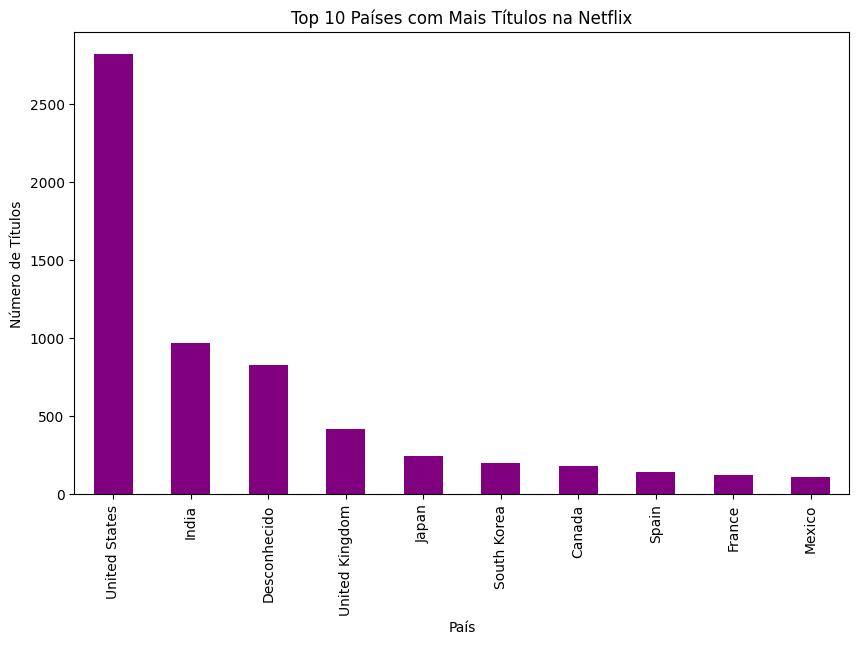

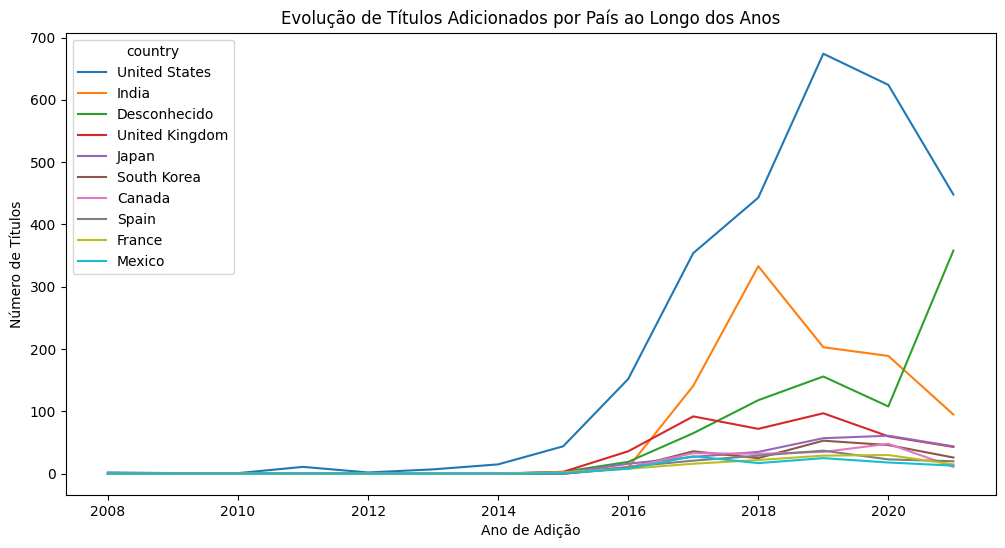

In [9]:
# Contagem de títulos por país
df['country'] = df['country'].fillna('Desconhecido')
top_paises = df['country'].value_counts().head(10)

# Plotar o gráfico de países com mais títulos
plt.figure(figsize=(10,6))
top_paises.plot(kind='bar', color='purple')
plt.title('Top 10 Países com Mais Títulos na Netflix')
plt.xlabel('País')
plt.ylabel('Número de Títulos')
plt.show()

# Verifica a distribuição ao longo do tempo para os principais países
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df_paises_ano = df.groupby(['year_added', 'country']).size().unstack(fill_value=0)[top_paises.index]

# Plotar a evolução ao longo do tempo
df_paises_ano.plot(figsize=(12,6))
plt.title('Evolução de Títulos Adicionados por País ao Longo dos Anos')
plt.xlabel('Ano de Adição')
plt.ylabel('Número de Títulos')
plt.show()



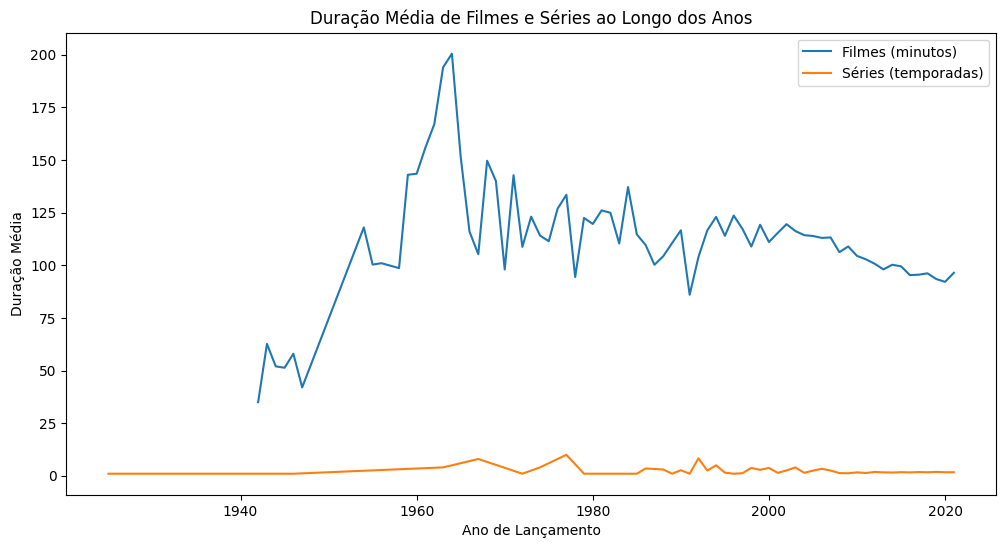

In [8]:
# Filtra filmes e séries e limpa a coluna de duração
df_filmes = df[df['type'] == 'Movie'].copy()
df_filmes['duration'] = df_filmes['duration'].str.replace(' min', '').astype(float)

df_series = df[df['type'] == 'TV Show'].copy()
df_series['duration'] = df_series['duration'].str.extract('(\d+)').astype(float)  # Número de temporadas

# Calcula a duração média por ano para filmes e séries
media_duracao_filmes = df_filmes.groupby('release_year')['duration'].mean()
media_duracao_series = df_series.groupby('release_year')['duration'].mean()

# Plotar a duração média de filmes e séries ao longo dos anos
plt.figure(figsize=(12,6))
plt.plot(media_duracao_filmes, label='Filmes (minutos)')
plt.plot(media_duracao_series, label='Séries (temporadas)')
plt.title('Duração Média de Filmes e Séries ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração Média')
plt.legend()
plt.show()
